In [1]:
# Utility
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Data preprocessing
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Preberemo podatke iz fila
df = pd.read_csv('btcusd_1h.csv')

# Kreiramo nov data frame samo s podatki, ki nas zanimajo
data_frame = pd.DataFrame({'price': df['open']})

# Spremenljivka za napovedovanje 'n' ur v prihodnost
prediction_hours = 48 # 2 dni = 48 ur
# prediction_hours = 72 # 3 dni = 72 ur
# prediction_hours = 96 # 4 dni = 96 ur

# Dodamo stolpec v data frame, kjer cene zamaknemo za 'n' gor
data_frame['prediction'] = data_frame[['price']].shift(-prediction_hours)

In [3]:
# Neodvisna spremenljivka - dejanska cena za trenutno uro
X = np.array(data_frame.drop(['prediction'], 1))
# Odrežemo zadnjih 'n' vrednosti, ker imamo vrednosti NaN
X = X [:-prediction_hours]

# Odvisna spremenljivka - dejanska cena čez 'n' ur
y = np.array(data_frame['prediction'])
# Odrežemo zadnjih 'n' vrednosti, ker imamo vrednosti NaN
y = y [:-prediction_hours]

# Razdelimo množico na učno in testno množico v razmerju 80 : 20
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Seznama z vrednostmi MSE in R2
mses = list()
r2s = list()
maes = list()

In [4]:
# Ustvarimo in natreniramo Random Forest Regresijo
random_forest = RandomForestRegressor(n_estimators=50)
random_forest.fit(x_train,y_train)

# Testiramo naučen model
random_forest_predictions = random_forest.predict(x_test)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

mses.append(random_forest_mse)
maes.append(random_forest_mae)
r2s.append(random_forest_r2)

# Izpis metrik
print("Random_forest mean squared error: ", random_forest_mse)
print("Random_forest mean absolute error: ", random_forest_mae)
print("Random_forest r2 score: ", random_forest_r2)

Random_forest mean squared error:  347458.18245345954
Random_forest mean absolute error:  443.99092929996755
Random_forest r2 score:  0.7202070595571644


In [5]:
# Ustvarimo in natreniramo Huberjevo Regresijo
huber = HuberRegressor()
huber.fit(x_train, y_train)

# Testiramo naučen model
huber_predictions = huber.predict(x_test)
huber_mse = mean_squared_error(y_test, huber_predictions)
huber_mae = mean_absolute_error(y_test, huber_predictions)
huber_r2 = r2_score(y_test, huber_predictions)

mses.append(huber_mse)
maes.append(huber_mae)
r2s.append(huber_r2)

# Izpis metrik
print("Huber mean squared error: ", huber_mse)
print("Huber mean absolute error: ", huber_mae)
print("Huber r2 score: ", huber_r2)

Huber mean squared error:  157729.2685179988
Huber mean absolute error:  269.23405875400823
Huber r2 score:  0.8729874901177217


In [6]:
# Ustvarimo in natreniramo Linearno Regresijo
linear = LinearRegression()
linear.fit(x_train, y_train)

# Testiramo naučen model
linear_predictions = linear.predict(x_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

mses.append(linear_mse)
maes.append(linear_mae)
r2s.append(linear_r2)

# Izpis metrik
print("Linear mean squared error: ", linear_mse)
print("Linear mean absolute error: ", linear_mae)
print("Linear r2 score: ", linear_r2)

Linear mean squared error:  152755.1263543451
Linear mean absolute error:  264.5058775699
Linear r2 score:  0.8769929501483997


In [7]:
# Ustvarimo in natreniramo Gradient Boosting regresijo
gradient_boost = GradientBoostingRegressor()
gradient_boost.fit(x_train, y_train)

# Testiramo naučen model
gradient_predictions = gradient_boost.predict(x_test)
gradient_mse = mean_squared_error(y_test, gradient_predictions)
gradient_mae = mean_absolute_error(y_test, gradient_predictions)
gradient_r2 = r2_score(y_test, gradient_predictions)

mses.append(gradient_mse)
maes.append(gradient_mae)
r2s.append(gradient_r2)

# Izpis metrik
print("Gradient mean squared error: ", gradient_mse)
print("Gradient mean absolute error: ", gradient_mae)
print("Gradient r2 score: ", gradient_r2)

Gradient mean squared error:  171574.52495134395
Gradient mean absolute error:  285.0660682614278
Gradient r2 score:  0.8618385081558719


In [8]:
# Ustvarimo in natreniramo regresijsko odločitveno drevo
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)

# Testiramo naučen model
tree_predictions = tree.predict(x_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_mae = mean_absolute_error(y_test, tree_predictions)
tree_r2 = r2_score(y_test, tree_predictions)

mses.append(tree_mse)
maes.append(tree_mae)
r2s.append(tree_r2)

# Izpis metrik
print("Tree mean squared error: ", tree_mse)
print("Tree mean absolute error: ", tree_mae)
print("Tree r2 score: ", tree_r2)

Tree mean squared error:  530758.2034521522
Tree mean absolute error:  553.1133801649707
Tree r2 score:  0.5726035364617562


In [9]:
# Ustvarimo in natreniramo Support Vector Machine (Regresija) - radial basis function
svm = SVR(kernel="rbf", C=1e3, gamma=0.00002)
svm.fit(x_train, y_train)

# Testiramo naučen model
svm_predictions = svm.predict(x_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_mae = mean_absolute_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)

mses.append(svm_mse)
maes.append(svm_mae)
r2s.append(svm_r2)

# Izpis metrik
print("SVM mean squared error: ", svm_mse)
print("SVM mean absolute error: ", svm_mae)
print("SVM r2 score: ", svm_r2)

SVM mean squared error:  180600.69239124772
SVM mean absolute error:  295.8776800385135
SVM r2 score:  0.8545701286602234


In [22]:
comparison = pd.DataFrame({
    'Actual price': y_test, 
    'RFR prediction': random_forest_predictions, 
    'HR prediction': huber_predictions,
    'LR prediction': linear_predictions,
    'GBR prediction': gradient_predictions,
    'DTR prediction': tree_predictions,
    'SVM prediction': svm_predictions
})

score_comparison = pd.DataFrame({
    'MSE': mses,
    'MAE': maes,
    'R2': r2s
}, ['Random forest regression', 'Huber regression', 'Linear regression', 'Gradient boosting regression', 'Decision tree regression', 'Support vector machine'])

In [23]:
score_comparison

,MSE,MAE,R2
Random forest regression,347458.182453,443.990929,0.720207
Huber regression,157729.268518,269.234059,0.872987
Linear regression,152755.126354,264.505878,0.876993
Gradient boosting regression,171574.524951,285.066068,0.861839
Decision tree regression,530758.203452,553.113380,0.572604
Support vector machine,180600.692391,295.877680,0.854570


In [24]:
comparison.head(15)

,Actual price,RFR prediction,HR prediction,LR prediction,GBR prediction,DTR prediction,SVM prediction
0,10952.74,11199.67600,11395.898251,11315.789837,11351.031734,11351.63,11393.092121
1,10852.21,11450.05420,11419.434163,11338.820709,11351.031734,11427.68,11385.074995
2,10908.27,11287.02400,11388.577081,11308.625766,11351.031734,10767.60,11392.606047
3,10925.57,10404.40860,11414.426522,11333.920523,11351.031734,10072.58,11388.013018
4,10936.28,11243.05360,11402.838841,11322.581494,11351.031734,11081.84,11392.260834
5,10914.24,11991.22140,11452.474577,11371.152132,11351.031734,12428.83,11350.649187
6,10896.06,11304.64360,11521.940570,11439.127505,11351.031734,11288.13,11244.672915
7,10900.95,10678.36664,11531.415026,11448.398656,11351.031734,10676.04,11234.203614
8,10893.36,10698.87900,11556.713627,11473.154393,11351.031734,10509.99,11218.679954
9,10761.07,10865.89800,11498.344566,11416.037831,11351.031734,10820.32,11278.289277


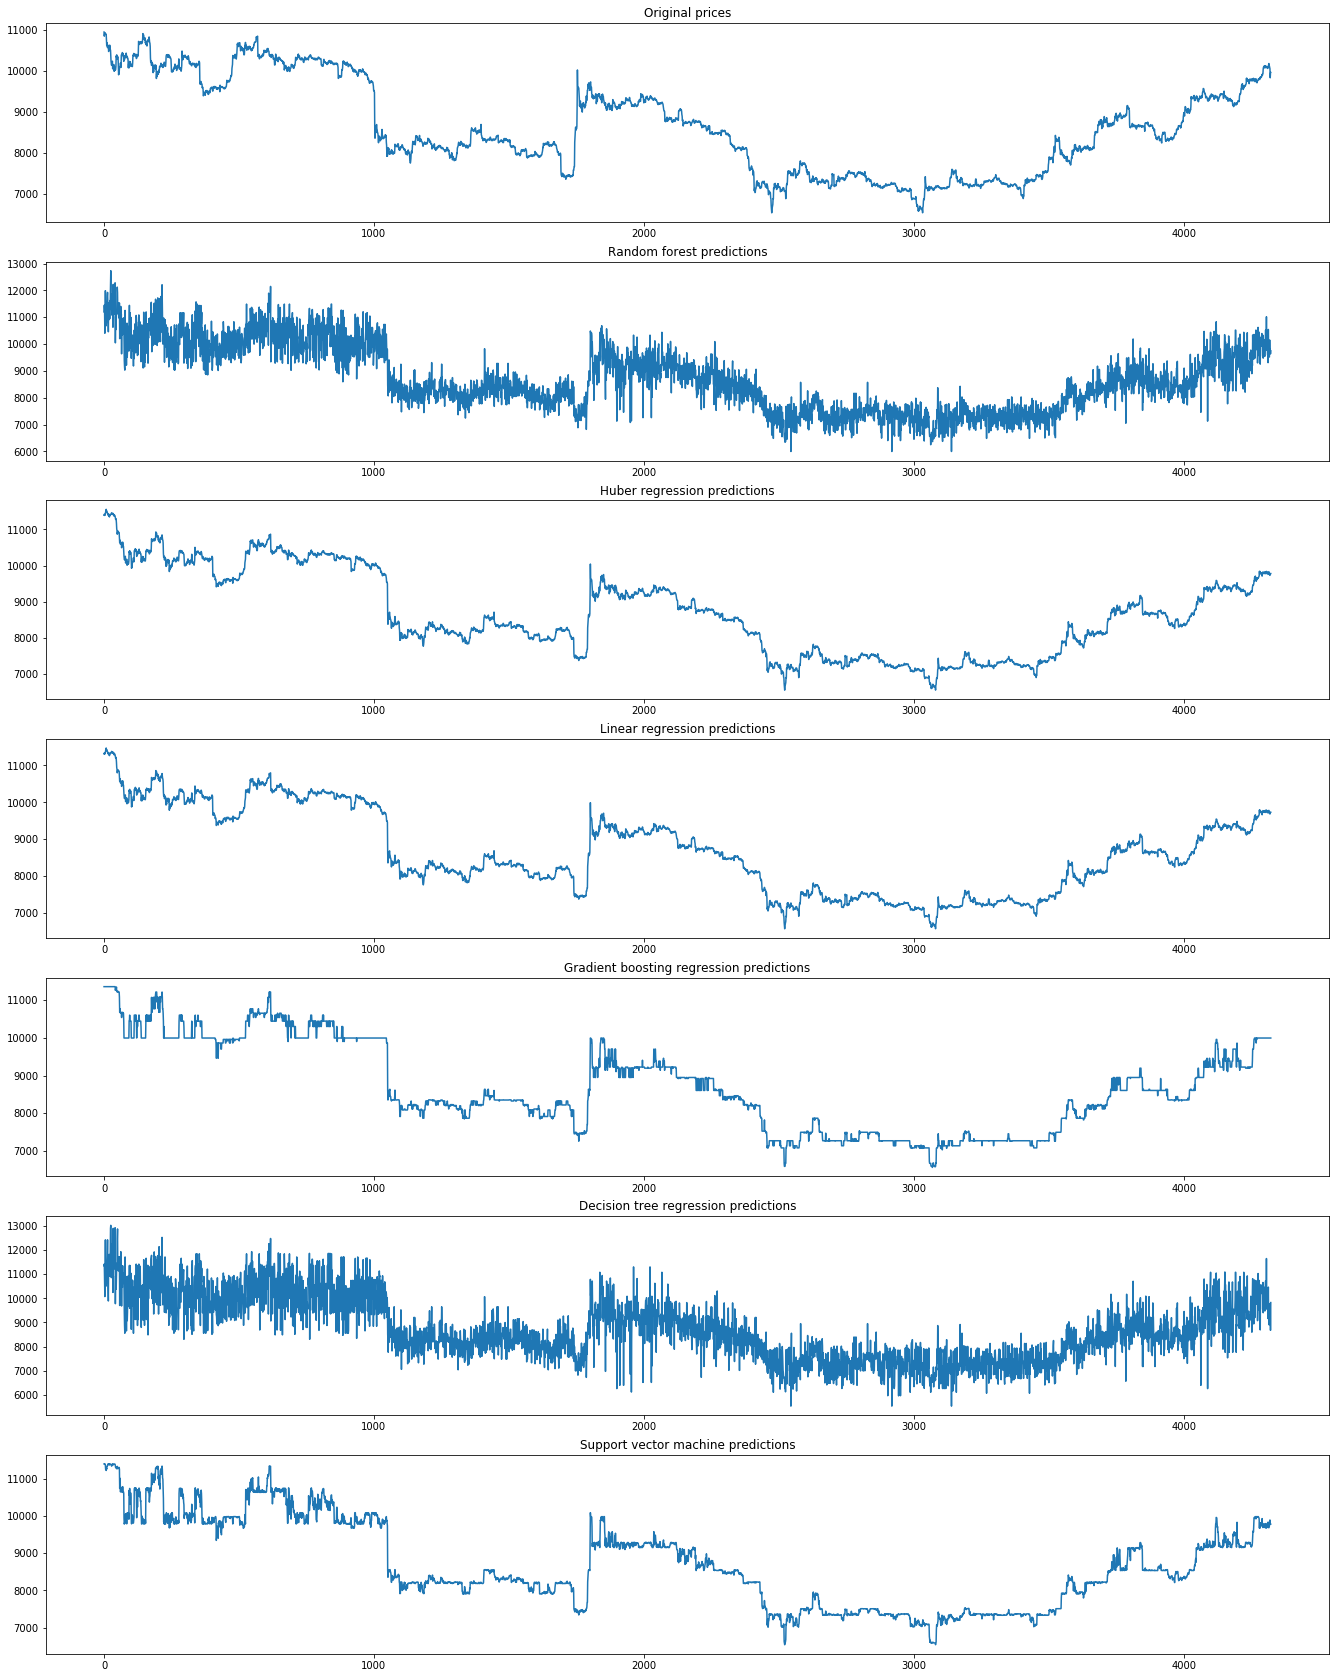

In [21]:
fig, ax = plt.subplots(7, figsize=(23,30))
ax[0].plot(y_test)
ax[0].set_title('Original prices')

ax[1].plot(random_forest_predictions)
ax[1].set_title('Random forest predictions')

ax[2].plot(huber_predictions)
ax[2].set_title('Huber regression predictions')

ax[3].plot(linear_predictions)
ax[3].set_title('Linear regression predictions')

ax[4].plot(gradient_predictions)
ax[4].set_title('Gradient boosting regression predictions')

ax[5].plot(tree_predictions)
ax[5].set_title('Decision tree regression predictions')

ax[6].plot(svm_predictions)
ax[6].set_title('Support vector machine predictions')

# plt.savefig("orig-SVM.png")
plt.show()